In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

SEED = 42

In [2]:
national_train = pd.read_csv('./Data/code-full-2015/full-national-train-test/National Train.csv')
national_test = pd.read_csv('./Data/code-full-2015/full-national-train-test/National Test.csv')

train_test_paths = './Data/pt-train-test-sets/'

def print_info(name):
    train = pd.read_csv(train_test_paths + f'{name} Train.csv')
    test = pd.read_csv(train_test_paths + f'{name} Test.csv')

    print(f'{name}\n')
    print('Train:')
    print(f'Shape: {train.shape[0]}\n')

    print(f'P/T Only: {len(train[train['Difference Type'] == 'P/T Only'])}')
    print(f'{(len(train[train['Difference Type'] == 'P/T Only']) / train.shape[0])}\n')

    print(f'National Only: {len(train[train['Difference Type'] == 'National Only'])}')
    print(f'{(len(train[train['Difference Type'] == 'National Only']) / train.shape[0])}\n')

    print(f'Difference: {len(train[(train['Difference Type'] == 'Common Sentence') & (train['Variation'] == 'Yes')])}')
    print(f'{(len(train[(train['Difference Type'] == 'Common Sentence') & (train['Variation'] == 'Yes')]) / train.shape[0])}\n')

    print(f'Common: {len(train[(train['Difference Type'] == 'Common Sentence') & ((train['Variation'] == 'No') | (train['Variation'].isna()))])}')
    print(f'{(len(train[(train['Difference Type'] == 'Common Sentence') & ((train['Variation'] == 'No') | (train['Variation'].isna()))]) / train.shape[0])}\n')
    print(f'Missing labels: {len(train[train['Difference Type'].isna()])}\n\n')

    print('Test:')
    print(f'Shape: {test.shape[0]}')
    print(f'P/T Only: {len(test[test['Difference Type'] == 'P/T Only'])}')
    print(f'{len(test[test['Difference Type'] == 'P/T Only']) / test.shape[0]}')
    print(f'National Only: {len(test[test['Difference Type'] == 'National Only'])}')
    print(f'{len(test[test['Difference Type'] == 'National Only']) / test.shape[0]}')
    print(f'Difference: {len(test[(test['Difference Type'] == 'Common Sentence') & (test['Variation'] == 'Yes')])}')
    print(f'{len(test[(test['Difference Type'] == 'Common Sentence') & (test['Variation'] == 'Yes')]) / test.shape[0]}')
    print(f'Common: {len(test[(test['Difference Type'] == 'Common Sentence') & ((test['Variation'] == 'No') | (test['Variation'].isna()))])}')
    print(f'{len(test[(test['Difference Type'] == 'Common Sentence') & ((test['Variation'] == 'No') | (test['Variation'].isna()))]) / test.shape[0]}')
    print(f'Missing labels: {len(test[test['Difference Type'].isna()])}\n')
    print()


FileNotFoundError: [Errno 2] No such file or directory: './Data/code-full-2015/full-national-train-test/National Train.csv'

In [ ]:
pt_name = ['AB', 'BC', 'NS', 'NU', 'ON', 'PE', 'SK']

for pt in pt_name:
    print_info(pt)

AB

Train:
Shape: 802

P/T Only: 520
0.6483790523690773

National Only: 32
0.0399002493765586

Difference: 100
0.12468827930174564

Common: 145
0.18079800498753118

Missing labels: 5


Test:
Shape: 200
P/T Only: 130
0.65
National Only: 6
0.03
Difference: 22
0.11
Common: 41
0.205
Missing labels: 1


BC

Train:
Shape: 754

P/T Only: 204
0.27055702917771884

National Only: 167
0.22148541114058357

Difference: 225
0.2984084880636605

Common: 158
0.20954907161803712

Missing labels: 0


Test:
Shape: 188
P/T Only: 53
0.28191489361702127
National Only: 45
0.2393617021276596
Difference: 52
0.2765957446808511
Common: 38
0.20212765957446807
Missing labels: 0


NS

Train:
Shape: 66

P/T Only: 61
0.9242424242424242

National Only: 0
0.0

Difference: 5
0.07575757575757576

Common: 0
0.0

Missing labels: 0


Test:
Shape: 16
P/T Only: 13
0.8125
National Only: 0
0.0
Difference: 3
0.1875
Common: 0
0.0
Missing labels: 0


NU

Train:
Shape: 6

P/T Only: 0
0.0

National Only: 5
0.8333333333333334

Differe

In [ ]:
def text_preprocessing(column):
    column = column.str.replace('', ' ') \
                    .str.strip() \
                    .str.replace(r'^[\da-zA-Z]+\)', ' ', regex=True) \
                    .str.replace('\n', ' ') \
                    .str.replace('\x93', ' ') \
                    .str.replace('\x94', ' ') \
                    .str.replace('\x96', ' ') \
                    .str.replace('\x97', ' ') \
                    .str.replace(r' [\da-zA-Z]+\) ', ' ', regex=True) \
                    .str.replace(r'\s{2,}', ' ', regex=True) \
                    .str.replace('?', ' ') \
                    .str.replace(r' \(\d+\)|\(\w+\) ', ' ', regex=True) \
                    .str.replace(r'^\d+(\.\d+)*[A-Za-z]*\.?\s*', '', regex=True) \
                    .str.strip()
    # .str.replace(r'\s*\(.*?\)$', '', regex=True) \

    return column

In [ ]:
def sentence_similarity(s1, s2, threshold):
    if isinstance(s1, str) and isinstance(s2, str):
        words1 = s1.strip().split()
        words2 = s2.strip().split()
        # common_words = set(words1) & set(words2)
        
        common_words = [word for word in words1 if word in words2]
        max_len = max(len(words1), len(words2))
        similarity = len(common_words) / max_len

    #     if max_len <= 20:
    #         threshold = (max_len - 4) / max_len
            
    #     return similarity >= threshold
    # else:
    #     return False
        return similarity
    else:
        return 0

In [ ]:
def save_similarity_scores(string, threshold=0.7):
    results = []

    df = pd.read_csv(f'./Data/2015-divb/code-variations-2015-divb/DivB {string} Variations 2015.csv')
    df['National Sentence Text'] = text_preprocessing(df['National Sentence Text'])

    national_full['National Full'] = text_preprocessing(national_full['National Full'])
    national_unique = national_full['National Full'].unique()
    
    for pt_index, pt_row in df.iterrows():
        pt_sentence = pt_row['National Sentence Text']
        
        for national_sentence in national_unique:
            similarity = sentence_similarity(pt_sentence, national_sentence, threshold)
            
            if similarity >= threshold:
                results.append({
                    'National in Full': national_sentence,
                    f'National in {string}': pt_sentence,
                    'Similarity': similarity
                })
    
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='Similarity', ascending=False)
    
    results_df.to_csv(f'./Data/old-similarity/Old {string} Similarity.csv', index=False)
    print(f'{string} similarity scores saved')

In [ ]:
pt_name = ['AB', 'BC', 'NS', 'NU', 'ON', 'PE', 'SK']

for pt in pt_name:
    save_similarity_scores(pt, 0.9)

AB similarity scores saved
BC similarity scores saved
NS similarity scores saved
NU similarity scores saved
ON similarity scores saved
PE similarity scores saved
SK similarity scores saved


In [ ]:
def add_to_df(s1, s2, threshold):
    if isinstance(s1, str) and isinstance(s2, str):
        words1 = s1.strip().split()
        words2 = s2.strip().split()
        # common_words = set(words1) & set(words2)
        
        common_words = [word for word in words1 if word in words2]
        max_len = max(len(words1), len(words2))
        similarity = len(common_words) / max_len
            
        return similarity >= threshold
    else:
        return False
        

In [ ]:
def split_and_save_data(string, threshold=0.7):

    df = pd.read_csv(f'./Data/2015-divb/code-variations-2015-divb/DivB {string} Variations 2015.csv')
    df['National Sentence Text'] = text_preprocessing(df['National Sentence Text'])

    national_full['National Full'] = text_preprocessing(national_full['National Full'])

    # Creating a duplicate dataframe to work with
    ddf = df.copy()

    # Isolating the train/test sentences in full national code data with exact match and removing them from the dataframe
    train = ddf[ddf['National Sentence Text'].isin(unique_train)]
    ddf = ddf[~ddf.index.isin(train.index)]

    test = ddf[ddf['National Sentence Text'].isin(unique_test)]
    ddf = ddf[~ddf.index.isin(test.index)]


    # Checking for sentences with a certain threshold match in the train and test data and removing them from the dataframe
    train = pd.concat([train, ddf[ddf['National Sentence Text'].apply(lambda x: any(add_to_df(x, s, threshold) for s in unique_train))]])
    ddf = ddf[~ddf.index.isin(train.index)]
    
    test = pd.concat([test, ddf[ddf['National Sentence Text'].apply(lambda x: any(add_to_df(x, s, threshold) for s in unique_test))]])
    ddf = ddf[~ddf.index.isin(test.index)]


    # Checking for empty National Sentence Texts and combining all three dataframes
    empty = ddf[ddf['National Sentence Text'].isna()]
    main = pd.concat([train, test, empty])
    other_national = ddf[~ddf.index.isin(main.index)]

    # # Isolating the national sentence texts in the variations data but not in the full data
    #  other_national = df[~df.index.isin(main.index)]

    empty_train = pd.DataFrame()
    empty_test = pd.DataFrame()
    
    if empty.shape[0] != 0:
        total_train = int(np.round(0.8 * main.shape[0]))
        total_test = main.shape[0] - total_train

        empty_train_len = total_train - train.shape[0]
        empty_test_len = total_test - test.shape[0]

        empty_train, empty_test = train_test_split(empty, train_size=empty_train_len, test_size=empty_test_len, random_state=SEED)

    train_set = pd.concat([train, empty_train])
    test_set = pd.concat([test, empty_test])

    print(f"{string}")
    print(f"Full Data: {df.shape[0]}")
    print(f"Train: {train_set.shape[0]}")
    print(f"Test: {test_set.shape[0]}")
    print(f"National sentences in variations data but not in full data: {other_national.shape[0]}")

    # Check if there are any common sentences between the train and test data
    print(f"Common sentences between train and test: {(set(train['National Sentence Text']) & set(test['National Sentence Text']))}\n")

    # Saving the test dataframes as csv files
    test_set.to_csv(f'./Data/pt-train-test-sets/old-test-sets/Old {string} Test.csv', index=False)


    return train_set, test_set, other_national

In [ ]:
# Store all P/T names in a list
pt_name = {'AB': 0.9, 'BC': 0, 'NS': 0, 'NU': 0, 'ON': 0.9, 'PE': 0, 'SK': 0}

for pt, threshold in pt_name.items():
    train, test, other = split_and_save_data(pt)
    other.to_csv(f'./Data/pt-train-test-sets/old-test-sets/Old {pt} Other.csv', index=False)

AB
Full Data: 1037
Train: 803
Test: 201
National sentences in variations data but not in full data: 33
Common sentences between train and test: set()

BC
Full Data: 942
Train: 750
Test: 188
National sentences in variations data but not in full data: 4
Common sentences between train and test: set()

NS
Full Data: 83
Train: 66
Test: 16
National sentences in variations data but not in full data: 1
Common sentences between train and test: set()

NU
Full Data: 8
Train: 6
Test: 2
National sentences in variations data but not in full data: 0
Common sentences between train and test: set()

ON
Full Data: 9245
Train: 7358
Test: 1840
National sentences in variations data but not in full data: 47
Common sentences between train and test: set()

PE
Full Data: 41
Train: 33
Test: 8
National sentences in variations data but not in full data: 0
Common sentences between train and test: set()

SK
Full Data: 67
Train: 54
Test: 13
National sentences in variations data but not in full data: 0
Common sentence

##### Example of assigning labels

[0.65 0.78 0.92 0.95 0.57] - National Sentences
[0.85 0.32 0.75 0.70 0.79]
[0.50 0.26 0.30 0.92 0.80]
[0.72 0.59 0.22 0.83 0.09]
   |
P/T Sentences

National Sentences: 4
P/T Sentences: 5

In [ ]:
import numpy as np
from scipy.optimize import linear_sum_assignment

def max_weighted_matching(cost_matrix):
    # Get the dimensions of the original cost matrix
    n, m = cost_matrix.shape
    
    # Determine the size of the new square matrix
    size = max(n, m)
    
    # Create a new square cost matrix with the same elements and additional zero-weight edges
    padded_cost_matrix = np.zeros((size, size))
    padded_cost_matrix[:n, :m] = cost_matrix

    # Since linear_sum_assignment solves the minimization problem,
    # we need to negate the cost matrix to maximize the weights.
    padded_cost_matrix = -padded_cost_matrix

    row_ind, col_ind = linear_sum_assignment(padded_cost_matrix)

    # Filter out the dummy assignments
    valid_assignments = [(i, j) for i, j in zip(row_ind, col_ind) if i < n and j < m]
    max_weight = sum(-padded_cost_matrix[i, j] for i, j in valid_assignments)

    return max_weight, valid_assignments

# Example usage
cost_matrix = np.array([
    [4, 1, 3],
    [2, 0, 5]
])

max_weight, matching = max_weighted_matching(cost_matrix)
print(f"Maximum Weight: {max_weight}")
print("Matching:", matching)


Maximum Weight: 9.0
Matching: [(0, 0), (1, 2)]


In [ ]:
!pip3 install networkx

  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
Using cached networkx-3.3-py3-none-any.whl (1.7 MB)


In [ ]:
import networkx as nx

def max_weighted_matching(cost_matrix):
    n, m = cost_matrix.shape
    
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add source and sink nodes
    source, sink = 'source', 'sink'
    
    # Add edges from source to U partition nodes
    for i in range(n):
        G.add_edge(source, f'U{i}', capacity=1, weight=0)
    
    # Add edges from V partition nodes to sink
    for j in range(m):
        G.add_edge(f'V{j}', sink, capacity=1, weight=0)
    
    # Add edges between U and V partition nodes with negated weights
    for i in range(n):
        for j in range(m):
            G.add_edge(f'U{i}', f'V{j}', capacity=1, weight=-cost_matrix[i, j])
    
    # Compute minimum cost maximum flow
    flow_dict = nx.max_flow_min_cost(G, source, sink)
    
    # Extract the matching and compute the total weight
    max_weight = 0
    matching = []
    for i in range(n):
        for j in range(m):
            if flow_dict[f'U{i}'][f'V{j}'] > 0:
                matching.append((i, j))
                max_weight += cost_matrix[i, j]
    
    return max_weight, matching

# Example usage
cost_matrix = np.array([
    [4, 1, 3],
    [2, 0, 5]
])

max_weight, matching = max_weighted_matching(cost_matrix)
print(f"Maximum Weight: {max_weight}")
print("Matching:", matching)


Maximum Weight: 9
Matching: [(0, 0), (1, 2)]


In [ ]:
import numpy as np
from scipy.optimize import linear_sum_assignment

# Example cosine similarity matrix
cosine_similarity_matrix = np.array([
    [0.1, 0.2],
    [0.3, 0.8],
    [0.5, 0.7],
    [0.6, 0.2],
    [0.4, 0.9]
])

# Negate the cosine similarity matrix
negated_cosine_similarity_matrix = -cosine_similarity_matrix

# Use the Hungarian algorithm to find the optimal assignment
row_ind, col_ind = linear_sum_assignment(negated_cosine_similarity_matrix)

# Save the matchings and sort by descending cosine similarity scores
matchings = []
for r, c in zip(row_ind, col_ind):
    matchings.append((r, c, cosine_similarity_matrix[r, c]))

# Sort matchings by descending similarity scores
matchings.sort(key=lambda x: x[2], reverse=True)

# Print the result
print("Matchings (National sentence, P/T sentence, similarity score) in descending order of similarity:")
for match in matchings:
    print(f"National sentence {match[0]} matched with P/T sentence {match[1]} with similarity {match[2]}")

# Also, you can convert it to a structured format if needed
import pandas as pd

matchings_df = pd.DataFrame(matchings, columns=['National sentence', 'P/T sentence', 'Similarity score'])
print(matchings_df)


Matchings (National sentence, P/T sentence, similarity score) in descending order of similarity:
National sentence 4 matched with P/T sentence 1 with similarity 0.9
National sentence 3 matched with P/T sentence 0 with similarity 0.6
   National sentence  P/T sentence  Similarity score
0                  4             1               0.9
1                  3             0               0.6


In [ ]:
Str1 = "Back"
Str2 = "Book"
Result = Str1 == Str2
print(Result)

False


### Function in baseline.ipynb to label and save the output

In [ ]:
# Label the sentences based on cosine similarity
def label_and_save(similarity_matrix, model_name):
    # similarity_data = []

    # for i, row in enumerate(similarity_matrix):
    #     max_sim = np.max(row)
    #     if max_sim < variation_threshold:
    #         similarity_data.append((i, -1, 'National Only', max_sim))
    #     else:
    #         if max_sim >= common_threshold:
    #             similarity_data.append((i, np.argmax(row), 'Common Sentence', max_sim))
    #         else:
    #             similarity_data.append((i, np.argmax(row), 'Variation', max_sim))

    # for j, row in enumerate(similarity_matrix.T):
    #     max_sim = np.max(row)
    #     if max_sim < variation_threshold:
    #         similarity_data.append((-1, j, 'P/T Only', max_sim))
    #     else:
    #         if max_sim >= common_threshold:
    #             similarity_data.append((np.argmax(row), j, 'Common Sentence', max_sim))
    #         else:
    #             similarity_data.append((np.argmax(row), j, 'Variation', max_sim))

    # results = []

    # for national_index, pt_index, label, sim in similarity_data:

    #     if label == 'National Only':
    #         national_sentence = national_df['FRAG_DOCUMENT'][national_index]
    #         matched_rows = national_similarity[national_similarity['National Full'] == national_df['FRAG_DOCUMENT'][national_index]]

    #         if not matched_rows.empty:
    #             matched_national_sentence = matched_rows[f'National in {string}'].values[0]
    #         else:
    #             matched_national_sentence = ''       
    #         results.append({
    #             'National DocID': national_df['DOCID'][national_index],
    #             'National Sentence Number': national_df['PROVISION'][national_index],
    #             'National Article Title': national_df['ARTICLE_TITLE'][national_index],
    #             'National Sentence Text': national_sentence,
    #             'Matched National Sentence (Variation)': matched_national_sentence,
    #             'P/T DocID': '',
    #             'P/T Sentence Number': '',
    #             'P/T Article Title': '',
    #             'P/T Sentence Text': '',
    #             'Label': label,
    #             'Similarity': sim
    #         })

        # elif label == 'P/T Only':
        #     pt_sentence = pt_df['PT Sentence Text'][pt_index]
        #     matched_pt = pt_similarity[pt_similarity[f'{string} Full'] == pt_df['PT Sentence Text'][pt_index]]
        #     if not matched_pt.empty:
        #         matched_pt_sentence = matched_pt[f'{string} Variations'].values[0]
        #     else:
        #         matched_pt_sentence = '' 
        #     results.append({
        #         'National DocID': '',
        #         'National Sentence Number': '',
        #         'National Article Title': '',
        #         'National Sentence Text': '',
        #         'P/T DocID': pt_df['DOCID'][pt_index],
        #         'P/T Sentence Number': pt_df['PT Sentence Number'][pt_index],
        #         'P/T Article Title': pt_df['ARTICLE_TITLE'][pt_index],
        #         'P/T Sentence Text': pt_sentence,
        #         'Matched P/T Sentence (Variation)': matched_pt_sentence,
        #         'Label': label,
        #         'Similarity': sim
        #     })

        # else:
        #     national_sentence = national_df['FRAG_DOCUMENT'][national_index]
        #     matched_rows = national_similarity[national_similarity['National Full'] == national_df['FRAG_DOCUMENT'][national_index]]
        #     if not matched_rows.empty:
        #         matched_national_sentence = matched_rows[f'National in {string}'].values[0]
        #     else:
        #         matched_national_sentence = ''

        #     pt_sentence = pt_df['PT Sentence Text'][pt_index]
        #     matched_pt = pt_similarity[pt_similarity[f'{string} Full'] == pt_df['PT Sentence Text'][pt_index]]
        #     if not matched_pt.empty:
        #         matched_pt_sentence = matched_pt[f'{string} Variations'].values[0]
        #     else:
        #         matched_pt_sentence = '' 
        #     results.append({
        #         'National DocID': national_df['DOCID'][national_index],
        #         'National Sentence Number': national_df['PROVISION'][national_index],
        #         'National Article Title': national_df['ARTICLE_TITLE'][national_index],
        #         'National Sentence Text': national_sentence,
        #         'Matched National Sentence (Variation)': matched_national_sentence,
        #         'P/T DocID': pt_df['DOCID'][pt_index],
        #         'P/T Sentence Number': pt_df['PT Sentence Number'][pt_index],
        #         'P/T Article Title': pt_df['ARTICLE_TITLE'][pt_index],
        #         'P/T Sentence Text': pt_sentence,
        #         'Matched P/T Sentence (Variation)': matched_pt_sentence,
        #         'Label': label,
        #         'Similarity': sim
    #         })

    # results = pd.DataFrame(results)
    # results.drop_duplicates(inplace=True)
    # results.to_csv(f'./baseline-data/results/{string}/2015 {string} {model_name}.csv', index=False)
    # # print(f'{model_name} results saved successfully!')

    return


### Function in baseline.ipynb to save the cosine similarity scores

In [ ]:
# # Save the cosine similarity scores
    # # Function to create a DataFrame of the similarity scores
    # def save_cosine_similarities(national_df, pt_df, cosine_similarity, file_name, model_name):
    #     similarity_data = []
    #     for i, row in enumerate(cosine_similarity):
    #         for j, score in enumerate(row):
    #             similarity_data.append({
    #                 'National Sentence': national_df['Preprocessed Sentences'][i],
    #                 'P/T Sentence': pt_df['Preprocessed Sentences'][j],
    #                 'Cosine Similarity': score
    #             })

    #     similarity_df = pd.DataFrame(similarity_data)
    #     similarity_df.to_csv(f'./baseline-data/{file_name} {model_name}.csv', index=False)
    #     return similarity_df
    
    
    # # Save the cosine similarity scores
    # save_cosine_similarities(national_df, pt_df, cosine_similarity_bow, file_name, 'Bag of Words')
    # save_cosine_similarities(national_df, pt_df, cosine_similarity_tfidf, file_name, 'TF-IDF')
    # save_cosine_similarities(national_df, pt_df, cosine_similarity_n_hot, file_name, 'N-Hot Encoding')
    # print('Files saved successfully!')

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize.punkt import PunktSentenceTokenizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chikatis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
full_code_2015 = './Data/2015/full/div-b'
pt_full_2015 = full_code_2015 + '/pt-full'

national_2015_train = pd.read_csv(full_code_2015 + '/national-train-test/2015 National Train.csv')
national_2015_test = pd.read_csv(full_code_2015 + '/national-train-test/2015 National Test.csv')

national_2015_full = pd.concat([national_2015_train, national_2015_test], ignore_index=True)

In [3]:
# Preprocess the sentences using NLTK's Punkt tokenizer
tokenizer = PunktSentenceTokenizer()

def preprocess(sentences):
    # return [' '.join(tokenizer.tokenize(sentence.lower().replace(r'[\)]', '. ').replace(r'\)(?=[^\w\s])', ') '))) for sentence in sentences]
    preprocessed_sentences = []
    for sentence in sentences:
        if pd.isna(sentence):
            preprocessed_sentences.append('')
            continue
        
        # Convert to lowercase
        sentence = sentence.lower()

        # Ensure spaces after periods and closing parentheses if not followed by a digit or a character
        sentence = re.sub(r'\.(?=[^\d\s])', '. ', sentence)
        sentence = re.sub(r'(\))(?=[a-zA-Z])', ') ', sentence)

        # Tokenize the sentence
        tokens = tokenizer.tokenize(sentence)
        preprocessed_sentences.append(' '.join(tokens))
    return preprocessed_sentences

In [4]:
def baseline_models(national_df, pt_df, string, national_threshold, pt_threshold):
    # Extract the sentence texts columns
    national_sentences = national_df['FRAG_DOCUMENT']
    pt_sentences = pt_df['PT Sentence Text']

    national_df['Preprocessed Sentences'] = preprocess(national_sentences)
    pt_df['Preprocessed Sentences'] = preprocess(pt_sentences)


    # Calculate cosine similarity
    def calculate_similarity(matrix_a, matrix_b):
        return cosine_similarity(matrix_a, matrix_b)
    

    # Create a combined vocabulary
    corpus = list(national_df['Preprocessed Sentences']) + list(pt_df['Preprocessed Sentences'])


    
    # Bag of Words
    # Create vectors for Bag of Words
    vectorizer_bow = CountVectorizer()
    vectorizer_bow.fit(corpus)
    national_bow = vectorizer_bow.transform(national_df['Preprocessed Sentences'])
    pt_bow = vectorizer_bow.transform(pt_df['Preprocessed Sentences'])

    # Calculate cosine similarity
    cosine_similarity_bow = calculate_similarity(national_bow, pt_bow)



    # TF-IDF
    # Create vectors for TF-IDF
    vectorizer_tfidf = TfidfVectorizer()
    vectorizer_tfidf.fit(corpus)
    national_tfidf = vectorizer_tfidf.transform(national_df['Preprocessed Sentences'])
    pt_tfidf = vectorizer_tfidf.transform(pt_df['Preprocessed Sentences'])

    # Calculate cosine similarity
    cosine_similarity_tfidf = calculate_similarity(national_tfidf, pt_tfidf)



    # N-Hot Encoding
    # Build vocabulary for TF-IDF
    vocabulary_n_hot = list(vectorizer_bow.get_feature_names_out())

    # Create N-Hot vectors
    def n_hot_encode(sentences, vocab):
        n_hot_vectors = np.zeros((len(sentences), len(vocab)))
        for i, sentence in enumerate(sentences):
            for word in sentence.split():
                if word in vocab:
                    n_hot_vectors[i, vocab.index(word)] = 1
        return n_hot_vectors
    
    national_n_hot = n_hot_encode(national_df['Preprocessed Sentences'], vocabulary_n_hot)
    pt_n_hot = n_hot_encode(pt_df['Preprocessed Sentences'], vocabulary_n_hot)

    # Calculate cosine similarity
    cosine_similarity_n_hot = calculate_similarity(national_n_hot, pt_n_hot)


    national_similarity = pd.read_csv(f'./Data/2015/national-similarity/2015 {string} National Similarity.csv')
    pt_similarity = pd.read_csv(f'./Data/2015/pt-similarity/2015 {string} PT Similarity.csv')

    national_similarity = national_similarity[national_similarity['Similarity'] >= national_threshold]
    pt_similarity = pt_similarity[pt_similarity['Similarity'] >= pt_threshold]

    # Save the cosine similarity matchings for manual inspection
    def save_matchings(similarity_matrix, model_name, threshold):
        # Negate the similarity matrix
        negated_similarity_matrix = -similarity_matrix

        # Find the optimal assignment
        row_ind, col_ind = linear_sum_assignment(negated_similarity_matrix)

        # Save the matchings and sort by descending cosine similarity scores
        matchings = []
        for r, c in zip(row_ind, col_ind):
            matchings.append((r, c, similarity_matrix[r, c]))

        # Sort matchings by descending similarity scores
        matchings.sort(key=lambda x: x[2], reverse=True)

        results = []
        matched_national_indices = set()
        matched_pt_indices = set()

        for national_index, pt_index, sim in matchings:
            if sim >= threshold:
                national_sentence = national_df['FRAG_DOCUMENT'][national_index]
                pt_sentence = pt_df['PT Sentence Text'][pt_index]

                matched_rows = national_similarity[national_similarity['National Full'] == national_sentence]
                if not matched_rows.empty:
                    matched_national_sentence = matched_rows[f'National in {string}'].values[0]
                else:
                    matched_national_sentence = ''

                matched_pt = pt_similarity[pt_similarity[f'{string} Full'] == pt_df['PT Sentence Text'][pt_index]]
                if not matched_pt.empty:
                    matched_pt_sentence = matched_pt[f'{string} Variations'].values[0]
                else:
                    matched_pt_sentence = '' 

                results.append({
                    'National Sentence Text': national_sentence,
                    'Matched National Sentence (Variation)': matched_national_sentence,
                    'P/T Sentence Text': pt_sentence,
                    'Matched P/T Sentence (Variation)': matched_pt_sentence,
                    'Similarity': sim
                })
                matched_national_indices.add(national_index)
                matched_pt_indices.add(pt_index)

        # Add unmatched national sentences
        for i in range(len(national_df)):
            if i not in matched_national_indices:
                national_sentence = national_df['FRAG_DOCUMENT'][i]
                matched_rows = national_similarity[national_similarity['National Full'] == national_sentence]
                if not matched_rows.empty:
                    matched_national_sentence = matched_rows[f'National in {string}'].values[0]
                else:
                    matched_national_sentence = ''

                results.append({
                    'National Sentence Text': national_df['FRAG_DOCUMENT'][i],
                    'Matched National Sentence (Variation)': matched_national_sentence,
                    'P/T Sentence Text': '',
                    'Similarity': 0.0
                })

        # Add unmatched pt sentences
        for j in range(len(pt_df)):
            if j not in matched_pt_indices:
                pt_sentence = pt_df['PT Sentence Text'][j]
                matched_pt = pt_similarity[pt_similarity[f'{string} Full'] == pt_sentence]
                if not matched_pt.empty:
                    matched_pt_sentence = matched_pt[f'{string} Variations'].values[0]
                else:
                    matched_pt_sentence = ''

                results.append({
                    'National Sentence Text': '',
                    'P/T Sentence Text': pt_df['PT Sentence Text'][j],
                    'Matched P/T Sentence (Variation)': matched_pt_sentence,
                    'Similarity': 0.0
                })

        results_df = pd.DataFrame(results)
        results_df.to_csv(f'./baseline-data/matchings/{string}/2015 Matchings {string} {model_name}.csv', index=False)
        print(f'{model_name} matchings saved successfully')


    save_matchings(cosine_similarity_bow, 'Bag of Words', 0.73)
    save_matchings(cosine_similarity_tfidf, 'TF-IDF', 0.6)
    save_matchings(cosine_similarity_n_hot, 'N-Hot Encoding', 0.71)
    

def get_data(string):
    data = pd.read_csv(pt_full_2015 + f'/2015 DivB {string} Full.csv')
    data = data.drop_duplicates(subset=['PT Sentence Text'], keep='first').reset_index(drop=True)
    return data

# Province/Territory names with their respective thresholds (national similarity and pt similarity). These should not be changed
province_territories = {'AB': (0.7, 0.51), 'BC': (0, 0.84), 'NS': (0, 0.62), 'NU': (0, 0), 'ON': (0.55, 0.54), 'PE': (0, 0.85), 'SK': (0, 0.92)}

for pt, thresholds in province_territories.items():
    pt_df = get_data(pt)
    baseline_models(national_2015_full, pt_df, f'{pt}', thresholds[0], thresholds[1])
    print(f'{pt} done!\n')

def map_labels(row):
    if row['Difference Type'] == 'Common Sentence':
        if row['Variation'] == 'Yes':
            return 'Variation'
        else:
            return 'Common Sentence'
    return row['Difference Type']
    # if row['Label'] == 'Variation':
    #     return 'Common Sentence'
    # return row['Label']

def calculate_alignment_error_rate(pt_name):
    results_files = {
    'Bag of Words': f'./baseline-data/matchings/{pt_name}/2015 Matchings {pt_name} Bag of Words.csv',
    'TF-IDF': f'./baseline-data/matchings/{pt_name}/2015 Matchings {pt_name} TF-IDF.csv',
    'N-Hot': f'./baseline-data/matchings/{pt_name}/2015 Matchings {pt_name} N-Hot Encoding.csv'
    }
    test_df = pd.read_csv(f'./Data/2015/pt-train-test-sets/{pt_name} Test.csv')
    test_df['Label'] = test_df.apply(map_labels, axis=1)
    
    total_error_rates = {}
    misalignments = {model_name: [] for model_name in results_files}
    misalignments_test = {model_name: [] for model_name in results_files}

    for model_name, results_file in results_files.items():
        # Load the results CSV file for the current model into a DataFrame
        results_df = pd.read_csv(results_file)

        # Initialize total counters
        total_correct_alignments = 0
        total_predicted_alignments = 0
        total_actual_alignments = 0


        # Compare the labels and sentences to count the correct alignments
        for _, test_row in test_df.iterrows():
            matching_rows = []
            if test_row['Label'] == 'National Only':
                matching_rows = results_df[
                    (results_df['Matched National Sentence (Variation)'] == test_row['National Sentence Text'])]
                precise_alignments = results_df[
                    (results_df['Matched National Sentence (Variation)'] == test_row['National Sentence Text']) &
                    (results_df['P/T Sentence Text'].isna())]
            elif test_row['Label'] == 'P/T Only':
                matching_rows = results_df[
                    (results_df['Matched P/T Sentence (Variation)'] == test_row['P/T Sentence Text'])]
                precise_alignments = results_df[
                    (results_df['Matched P/T Sentence (Variation)'] == test_row['P/T Sentence Text']) &
                    (results_df['National Sentence Text'].isna())]
            else:
                matching_rows = results_df[
                    (results_df['Matched National Sentence (Variation)'] == test_row['National Sentence Text']) |
                    (results_df['Matched P/T Sentence (Variation)'] == test_row['P/T Sentence Text'])]
                precise_alignments = results_df[
                    (results_df['Matched National Sentence (Variation)'] == test_row['National Sentence Text']) &
                    (results_df['Matched P/T Sentence (Variation)'] == test_row['P/T Sentence Text'])]

            if not matching_rows.empty:
                total_predicted_alignments += len(matching_rows)
            if not precise_alignments.empty:
                total_correct_alignments += 1
            else:
                misalignments[model_name].append(matching_rows)
                misalignments_test[model_name].append(test_row.to_frame().T)

            total_actual_alignments += 1
            

        if total_actual_alignments + total_predicted_alignments > 0:
            total_alignment_error_rate = 1 - (2 * total_correct_alignments) / (total_predicted_alignments + total_actual_alignments)
        else:
            total_alignment_error_rate = float('inf')  # undefined if there are no alignments

        total_error_rates[model_name] = total_alignment_error_rate

    return total_error_rates, misalignments, misalignments_test

# Calculate Alignment Error Rates for each province/territory
pt_names = ['AB', 'BC', 'NS', 'NU', 'ON', 'PE', 'SK']

for pt_name in pt_names:
    total_error_rates, misalignments, misalignments_test = calculate_alignment_error_rate(pt_name)
    print(f"Total Alignment Error Rate for {pt_name}:")
    for model_name, error_rate in total_error_rates.items():
        print(f'   {model_name}: {error_rate}')
    print()

    # Save misalignments to a single CSV file for each model
    for model_name, misalignment_list in misalignments.items():
        if misalignment_list:
            all_misalignments_df = pd.concat(misalignment_list, ignore_index=True)
            all_misalignments_df.to_csv(f'./baseline-data/misalignments/{pt_name}/{pt_name} {model_name} Misalignments.csv', index=False)

    for model_name, misalignment_list in misalignments_test.items():
        if misalignment_list:
            all_misalignments_test_df = pd.concat(misalignment_list, ignore_index=True)
            all_misalignments_test_df.to_csv(f'./baseline-data/misalignments/{pt_name}/{pt_name} {model_name} Misalignments Test.csv', index=False)


Bag of Words matchings saved successfully
TF-IDF matchings saved successfully
N-Hot Encoding matchings saved successfully
AB done!

Bag of Words matchings saved successfully
TF-IDF matchings saved successfully
N-Hot Encoding matchings saved successfully
BC done!

Bag of Words matchings saved successfully
TF-IDF matchings saved successfully
N-Hot Encoding matchings saved successfully
NS done!

Bag of Words matchings saved successfully
TF-IDF matchings saved successfully
N-Hot Encoding matchings saved successfully
NU done!

Bag of Words matchings saved successfully
TF-IDF matchings saved successfully
N-Hot Encoding matchings saved successfully
ON done!

Bag of Words matchings saved successfully
TF-IDF matchings saved successfully
N-Hot Encoding matchings saved successfully
PE done!

Bag of Words matchings saved successfully
TF-IDF matchings saved successfully
N-Hot Encoding matchings saved successfully
SK done!

Total Alignment Error Rate for AB:
   Bag of Words: 0.07304785894206545
   T

### Function in baseline.ipynb to calculate the error rates for test set

In [ ]:
# Function to map all the labels
def map_labels(row):
    if row['Difference Type'] == 'Common Sentence':
        if row['Variation'] == 'Yes':
            return 'Variation'
        else:
            return 'Common Sentence'
    return row['Difference Type']



def calculate_alignment_error_rate(pt_name):
    results_files = {
    'Bag of Words': f'./baseline-data/matchings/{pt_name}/2015 Matchings {pt_name} Bag of Words.csv',
    'TF-IDF': f'./baseline-data/matchings/{pt_name}/2015 Matchings {pt_name} TF-IDF.csv',
    'N-Hot': f'./baseline-data/matchings/{pt_name}/2015 Matchings {pt_name} N-Hot Encoding.csv'
    }
    train_df = pd.read_csv(f'./Data/2015/pt-train-test-sets/{pt_name} Train.csv')
    train_df['Label'] = train_df.apply(map_labels, axis=1)
    
    total_error_rates = {}
    misalignments = {model_name: [] for model_name in results_files}
    misalignments_test = {model_name: [] for model_name in results_files}

    for model_name, results_file in results_files.items():
        # Load the results CSV file for the current model into a DataFrame
        results_df = pd.read_csv(results_file)

        # Initialize total counters
        total_correct_alignments = 0
        total_predicted_alignments = 0
        total_actual_alignments = 0


        # Compare the labels and sentences to count the correct alignments
        for _, train_row in train_df.iterrows():
            matching_rows = []
            if train_row['Label'] == 'National Only':
                matching_rows = results_df[
                    (results_df['Matched National Sentence (Variation)'] == train_row['National Sentence Text'])]
                precise_alignments = results_df[
                    (results_df['Matched National Sentence (Variation)'] == train_row['National Sentence Text']) &
                    (results_df['P/T Sentence Text'].isna())]
            elif train_row['Label'] == 'P/T Only':
                matching_rows = results_df[
                    (results_df['Matched P/T Sentence (Variation)'] == train_row['P/T Sentence Text'])]
                precise_alignments = results_df[
                    (results_df['Matched P/T Sentence (Variation)'] == train_row['P/T Sentence Text']) &
                    (results_df['National Sentence Text'].isna())]
            else:
                matching_rows = results_df[
                    (results_df['Matched National Sentence (Variation)'] == train_row['National Sentence Text']) |
                    (results_df['Matched P/T Sentence (Variation)'] == train_row['P/T Sentence Text'])]
                precise_alignments = results_df[
                    (results_df['Matched National Sentence (Variation)'] == train_row['National Sentence Text']) &
                    (results_df['Matched P/T Sentence (Variation)'] == train_row['P/T Sentence Text'])]

            if not matching_rows.empty:
                total_predicted_alignments += len(matching_rows)
            if not precise_alignments.empty:
                total_correct_alignments += 1
            else:
                misalignments[model_name].append(matching_rows)
                misalignments_test[model_name].append(train_row.to_frame().T)

            total_actual_alignments += 1
            

        if total_actual_alignments + total_predicted_alignments > 0:
            total_alignment_error_rate = 1 - (2 * total_correct_alignments) / (total_predicted_alignments + total_actual_alignments)
        else:
            total_alignment_error_rate = float('inf')  # undefined if there are no alignments

        total_error_rates[model_name] = total_alignment_error_rate

    return total_error_rates, misalignments, misalignments_test


In [ ]:
def get_data(string):
    data = pd.read_csv(pt_full_2015 + f'/2015 DivB {string} Full.csv')
    data = data.drop_duplicates(subset=['PT Sentence Text'], keep='first').reset_index(drop=True)
    return data

In [ ]:
# Province/Territory names with their respective thresholds (national similarity and pt similarity)
province_territories = {'AB': (0.7, 0.51), 'BC': (0, 0.84), 'NS': (0, 0.62), 'NU': (0, 0), 'ON': (0.55, 0.54), 'PE': (0, 0.85), 'SK': (0, 0.92)}

for pt, thresholds in province_territories.items():
    pt_df = get_data(pt)
    print(f'{pt}: ')
    baseline_models(national_2015_full, pt_df, f'{pt}', thresholds[0], thresholds[1])
    print(f'{pt} done!\n')

In [10]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.optimize import linear_sum_assignment

def preprocess(sentences):
    preprocessed_sentences = []
    for sentence in sentences:
        if pd.isna(sentence):
            preprocessed_sentences.append('')
            continue
        
        # Convert to lowercase
        sentence = sentence.lower()

        # Ensure spaces after periods and closing parentheses if not followed by a digit or a character
        sentence = re.sub(r'\.(?=[^\d\s])', '. ', sentence)
        sentence = re.sub(r'(\))(?=[a-zA-Z])', ') ', sentence)

        # Tokenize the sentence
        tokens = tokenizer.tokenize(sentence)
        preprocessed_sentences.append(' '.join(tokens))
    return preprocessed_sentences

def baseline_models(national_df, pt_df, string):
    # Extract the sentence texts columns
    national_sentences = national_df['FRAG_DOCUMENT']
    pt_sentences = pt_df['PT Sentence Text']

    national_df['Preprocessed Sentences'] = preprocess(national_sentences)
    pt_df['Preprocessed Sentences'] = preprocess(pt_sentences)

    # Calculate cosine similarity
    def calculate_similarity(matrix_a, matrix_b):
        return cosine_similarity(matrix_a, matrix_b)

    # Create a combined vocabulary
    corpus = list(national_df['Preprocessed Sentences']) + list(pt_df['Preprocessed Sentences'])

    # Bag of Words
    vectorizer_bow = CountVectorizer()
    vectorizer_bow.fit(corpus)
    national_bow = vectorizer_bow.transform(national_df['Preprocessed Sentences'])
    pt_bow = vectorizer_bow.transform(pt_df['Preprocessed Sentences'])

    cosine_similarity_bow = calculate_similarity(national_bow, pt_bow)

    # TF-IDF
    vectorizer_tfidf = TfidfVectorizer()
    vectorizer_tfidf.fit(corpus)
    national_tfidf = vectorizer_tfidf.transform(national_df['Preprocessed Sentences'])
    pt_tfidf = vectorizer_tfidf.transform(pt_df['Preprocessed Sentences'])

    cosine_similarity_tfidf = calculate_similarity(national_tfidf, pt_tfidf)

    # N-Hot Encoding
    vocabulary_n_hot = list(vectorizer_bow.get_feature_names_out())

    def n_hot_encode(sentences, vocab):
        n_hot_vectors = np.zeros((len(sentences), len(vocab)))
        for i, sentence in enumerate(sentences):
            for word in sentence.split():
                if word in vocab:
                    n_hot_vectors[i, vocab.index(word)] = 1
        return n_hot_vectors
    
    national_n_hot = n_hot_encode(national_df['Preprocessed Sentences'], vocabulary_n_hot)
    pt_n_hot = n_hot_encode(pt_df['Preprocessed Sentences'], vocabulary_n_hot)

    cosine_similarity_n_hot = calculate_similarity(national_n_hot, pt_n_hot)

    return cosine_similarity_bow, cosine_similarity_tfidf, cosine_similarity_n_hot

def get_data(string):
    data = pd.read_csv(pt_full_2015 + f'/2015 DivB {string} Full.csv')
    data = data.drop_duplicates(subset=['PT Sentence Text'], keep='first').reset_index(drop=True)
    return data

def save_matchings(similarity_matrix, national_df, pt_df, string, threshold, national_similarity, pt_similarity):
    negated_similarity_matrix = -similarity_matrix
    row_ind, col_ind = linear_sum_assignment(negated_similarity_matrix)

    results = []
    matched_national_indices = set()
    matched_pt_indices = set()

    for national_index, pt_index, sim in zip(row_ind, col_ind, similarity_matrix[row_ind, col_ind]):
        if sim >= threshold:
            national_sentence = national_df['FRAG_DOCUMENT'][national_index]
            pt_sentence = pt_df['PT Sentence Text'][pt_index]

            matched_rows = national_similarity[national_similarity['National Full'] == national_sentence]
            matched_national_sentence = matched_rows[f'National in {string}'].values[0] if not matched_rows.empty else ''

            matched_pt = pt_similarity[pt_similarity[f'{string} Full'] == pt_sentence]
            matched_pt_sentence = matched_pt[f'{string} Variations'].values[0] if not matched_pt.empty else ''

            results.append({
                'National Sentence Text': national_sentence,
                'Matched National Sentence (Variation)': matched_national_sentence,
                'P/T Sentence Text': pt_sentence,
                'Matched P/T Sentence (Variation)': matched_pt_sentence,
                'Similarity': sim
            })
            matched_national_indices.add(national_index)
            matched_pt_indices.add(pt_index)

    for i in range(len(national_df)):
        if i not in matched_national_indices:
            national_sentence = national_df['FRAG_DOCUMENT'][i]
            matched_rows = national_similarity[national_similarity['National Full'] == national_sentence]
            matched_national_sentence = matched_rows[f'National in {string}'].values[0] if not matched_rows.empty else ''

            results.append({
                'National Sentence Text': national_sentence,
                'Matched National Sentence (Variation)': matched_national_sentence,
                'P/T Sentence Text': '',
                'Similarity': 0.0
            })

    for j in range(len(pt_df)):
        if j not in matched_pt_indices:
            pt_sentence = pt_df['PT Sentence Text'][j]
            matched_pt = pt_similarity[pt_similarity[f'{string} Full'] == pt_sentence]
            matched_pt_sentence = matched_pt[f'{string} Variations'].values[0] if not matched_pt.empty else ''

            results.append({
                'National Sentence Text': '',
                'P/T Sentence Text': pt_sentence,
                'Matched P/T Sentence (Variation)': matched_pt_sentence,
                'Similarity': 0.0
            })

    results_df = pd.DataFrame(results)
    return results_df

def map_labels(row):
    if row['Difference Type'] == 'Common Sentence':
        if row['Variation'] == 'Yes':
            return 'Variation'
        else:
            return 'Common Sentence'
    return row['Difference Type']

def calculate_alignment_error_rate(test_df, results_df):
    total_correct_alignments = 0
    total_predicted_alignments = 0
    total_actual_alignments = 0

    for _, test_row in test_df.iterrows():
        matching_rows = []
        if test_row['Label'] == 'National Only':
            matching_rows = results_df[
                (results_df['Matched National Sentence (Variation)'] == test_row['National Sentence Text'])]
            precise_alignments = results_df[
                (results_df['Matched National Sentence (Variation)'] == test_row['National Sentence Text']) &
                (results_df['P/T Sentence Text'] == '')]
        elif test_row['Label'] == 'P/T Only':
            matching_rows = results_df[
                (results_df['Matched P/T Sentence (Variation)'] == test_row['P/T Sentence Text'])]
            precise_alignments = results_df[
                (results_df['Matched P/T Sentence (Variation)'] == test_row['P/T Sentence Text']) &
                (results_df['National Sentence Text'] == '')]
        else:
            matching_rows = results_df[
                (results_df['Matched National Sentence (Variation)'] == test_row['National Sentence Text']) |
                (results_df['Matched P/T Sentence (Variation)'] == test_row['P/T Sentence Text'])]
            precise_alignments = results_df[
                (results_df['Matched National Sentence (Variation)'] == test_row['National Sentence Text']) &
                (results_df['Matched P/T Sentence (Variation)'] == test_row['P/T Sentence Text'])]

        if not matching_rows.empty:
            total_predicted_alignments += len(matching_rows)
        if not precise_alignments.empty:
            total_correct_alignments += 1

        total_actual_alignments += 1

    if total_actual_alignments + total_predicted_alignments > 0:
        total_alignment_error_rate = 1 - (2 * total_correct_alignments) / (total_predicted_alignments + total_actual_alignments)
    else:
        total_alignment_error_rate = float('inf')

    return total_alignment_error_rate

# Province/Territory names with their respective thresholds
province_territories = {'AB': (0.7, 0.51), 'BC': (0, 0.84), 'NS': (0, 0.62), 'NU': (0, 0), 'ON': (0.55, 0.54), 'PE': (0, 0.85), 'SK': (0, 0.92)}

full_code_2015 = './Data/2015/full/div-b'
pt_full_2015 = full_code_2015 + '/pt-full'

national_2015_train = pd.read_csv(full_code_2015 + '/national-train-test/2015 National Train.csv')
national_2015_test = pd.read_csv(full_code_2015 + '/national-train-test/2015 National Test.csv')

national_2015_full = pd.concat([national_2015_train, national_2015_test], ignore_index=True)

thresholds = np.arange(0.5, 0.91, 0.01)
best_thresholds = {}

for pt, (national_threshold, pt_threshold) in province_territories.items():
    pt_df = get_data(pt)
    cosine_similarity_bow, cosine_similarity_tfidf, cosine_similarity_n_hot = baseline_models(national_2015_full, pt_df, f'{pt}')

    national_similarity = pd.read_csv(f'./Data/2015/national-similarity/2015 {pt} National Similarity.csv')
    pt_similarity = pd.read_csv(f'./Data/2015/pt-similarity/2015 {pt} PT Similarity.csv')

    national_similarity = national_similarity[national_similarity['Similarity'] >= national_threshold]
    pt_similarity = pt_similarity[pt_similarity['Similarity'] >= pt_threshold]

    model_similarities = {
        'Bag of Words': cosine_similarity_bow,
        'TF-IDF': cosine_similarity_tfidf,
        'N-Hot': cosine_similarity_n_hot
    }

    best_thresholds[pt] = {}
    for model_name, similarity_matrix in model_similarities.items():
        best_error_rate = float('inf')
        best_threshold = None
        for threshold in thresholds:
            results_df = save_matchings(similarity_matrix, national_2015_full, pt_df, f'{pt}', threshold, national_similarity, pt_similarity)
            test_df = pd.read_csv(f'./Data/2015/pt-train-test-sets/{pt} Test.csv')
            test_df['Label'] = test_df.apply(map_labels, axis=1)

            error_rate = calculate_alignment_error_rate(test_df, results_df)
            if error_rate < best_error_rate:
                best_error_rate = error_rate
                best_threshold = threshold

        best_thresholds[pt][model_name] = best_threshold
        print(f'{pt} {model_name}: Best Threshold = {best_threshold}, Error Rate = {best_error_rate}')

print("Best Thresholds for each province/territory and model:")
print(best_thresholds)

AB Bag of Words: Best Threshold = 0.7700000000000002, Error Rate = 0.06297229219143574
AB TF-IDF: Best Threshold = 0.5, Error Rate = 0.05316455696202527
AB N-Hot: Best Threshold = 0.5900000000000001, Error Rate = 0.048101265822784844
BC Bag of Words: Best Threshold = 0.6000000000000001, Error Rate = 0.2272727272727273
BC TF-IDF: Best Threshold = 0.5, Error Rate = 0.21518987341772156
BC N-Hot: Best Threshold = 0.6600000000000001, Error Rate = 0.202020202020202
NS Bag of Words: Best Threshold = 0.56, Error Rate = 0.1333333333333333
NS TF-IDF: Best Threshold = 0.5, Error Rate = 0.16129032258064513
NS N-Hot: Best Threshold = 0.53, Error Rate = 0.16129032258064513
NU Bag of Words: Best Threshold = 0.5, Error Rate = 0.0


KeyboardInterrupt: 

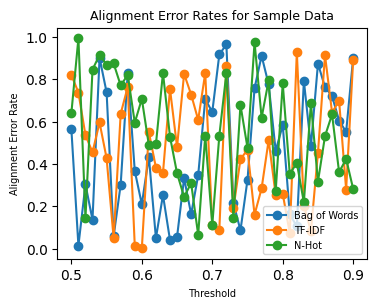

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
thresholds = np.arange(0.5, 0.91, 0.01)
error_rates_bow = np.random.rand(len(thresholds))  # Random error rates for demonstration
error_rates_tfidf = np.random.rand(len(thresholds))
error_rates_nhot = np.random.rand(len(thresholds))

# Define smaller figure size
fig, ax = plt.subplots(figsize=(4, 3))  # Adjust the width and height as needed

# Plot the data
ax.plot(thresholds, error_rates_bow, marker='o', label='Bag of Words')
ax.plot(thresholds, error_rates_tfidf, marker='o', label='TF-IDF')
ax.plot(thresholds, error_rates_nhot, marker='o', label='N-Hot')

# Set labels and title with adjusted font sizes
ax.set_xlabel('Threshold', fontsize=7)  # Adjust font size as needed
ax.set_ylabel('Alignment Error Rate', fontsize=7)  # Adjust font size as needed
ax.set_title('Alignment Error Rates for Sample Data', fontsize=9)  # Adjust font size as needed

# Add legend with adjusted font size
ax.legend(fontsize=7)  # Adjust font size as needed

# Show the plot
plt.show()
